In [5]:
import numpy as np  
import pandas as pd  # для работы с таблицами
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import scipy.stats as stats
import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [67]:
sigma = 15  # Стандартное отклонение
Z = 1.960  #% #Квантиль нормального распределения. 
Delta = 3 #% #Погрешность

In [68]:
n = int(((sigma*Z)/Delta)**2)
n

96

In [69]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [86]:
sigma = 15
delta = (sigma/5)*2.576
delta

7.728

In [87]:
A = 130 - delta
B = 130 + delta
L = int(B - A)
L

15

In [88]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [100]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

In [101]:
print(population_men.mean())
print(population_women.mean())

18.965365253423858
15.368105854473335


In [102]:
stat, p = stats.ttest_ind(a=population_men, b=population_women, equal_var=False) 
print('P value:',round(p*100,3))

P value: 1.706


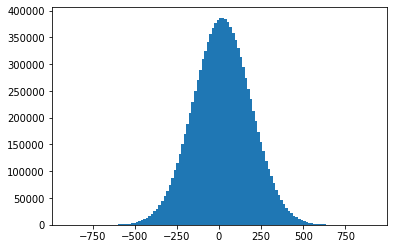

In [103]:
plt.hist(population_men, bins=120);
plt.hist(population_women, bins=120);

**ЧЕСТНО, НЕПОНЯТНО ПРАВИЛЬНО ЛИ Я СДЕЛАЛ ИЛИ НЕТ? МОЖЕТЕ АЛГОРИТМ НАПИСАТЬ, И ДАЛЕЕ КАК ПОЛУЧЕННОЕ ЗНАЧЕНИЕ P VALUE НУЖНО ИНТЕРПРИТИРОВАТЬ??? И ВОТ ЭТО УСЛОВИЕ " если уровень значимости равен  𝛼  = 0.001" ЧТО ПОДРАЗУМЕВАЕТ?***

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [104]:
Z = 2.241
sigma = 150
delta = 50

In [105]:
n = int(((sigma*Z)/Delta)**2)
n

12555

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

1. H0 - Волшебник предсказал что завтра будет дождь
2. H1 - Волшебник предсказал что завтра будет солнце

**Правильно ли я сформировал гипотезы?**

In [10]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

oddsratio, pvalue = stats.fisher_exact(observations)

if (pvalue < 0.05):
    print('Отвергаем H0')
else:
    print('Не отвергаем H0. Соответственно эфеект СЛУЧАЙНЫЙ.')

Не отвергаем H0. Соответственно эфеект СЛУЧАЙНЫЙ.


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [109]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.90):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [110]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [12]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

stat, pvalue = stats.ttest_ind(data_1, data_1, equal_var=False)

if (pvalue < 0.05):
    print('Отвергаем H0')
else:
    print('Не отвергаем H0. Соответственно эфеект СЛУЧАЙНЫЙ.')

Не отвергаем H0. Соответственно эфеект СЛУЧАЙНЫЙ.


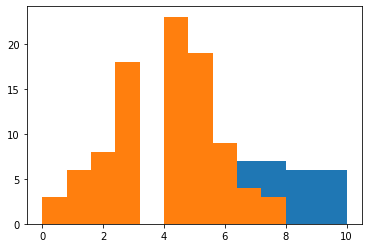

In [19]:
plt.hist(data_1, bins=10);
plt.hist(data_2, bins=10);

**Я получил pvalue = 1.0 Подскажите плиз какой будет Нулевая гипотеза в данной задаче и далее как правильно мы ее должны интерпретировать?**

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

**ВЫВОД:** Учитывая, что p value меньше чем значение альфа (равное 5%), то мы отвергаем нулевую гипотезу и заключем, что Распределение ненормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

1. H0 - Различие эффективности препаратов А и В является случайным. 
2. H1 - Различие эффективности препаратов А и В является не случайным. 

ПОДСКАЖИТЕ ПРАВИЛЬНО ЛИ Я СФОРМИРОВАЛ ГИПОТЕЗЫ?

In [24]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

stat, pvalue = stats.ttest_ind(A, B, equal_var=False)

if (pvalue < 0.05):
    print('Отвергаем H0')
else:
    print('Не отвергаем H0.', pvalue*100)

Не отвергаем H0. 5.128496127280013


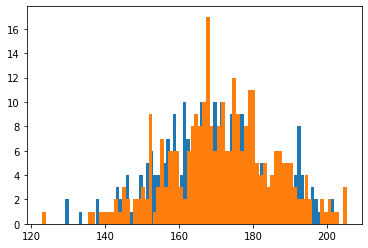

In [27]:
plt.hist(A, bins=80);
plt.hist(B, bins=80);

**ВОТ Я ПОЛУЧИЛ PVALUE = 5.12, НО ПРИ ЭТОМ КАК МНЕ ПОНЯТЬ, ЧТО ВЫБОРКИ ОТЛИЧАЮТСЯ ЗНАЧИТЕЛЬНО ИЛИ ЖЕ НЕТ???**